In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [2]:
len_of_agnr = 2
U_param = 19

In [3]:
file_name = "../xyz_files/7agnr/7_AGNR_len_{}.xyz".format(len_of_agnr)
geom = ase.io.read(file_name)
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])
    
max_coord = np.max(orb)+1

In [4]:
p_results_file = "../calculations/7agnr/processed_ev_7agnr{}_U{}.txt".format(len_of_agnr, U_param)
p_f = open(p_results_file, "r")

p_num_lines = sum(1 for line in open(p_results_file, "r"))
p_evals = np.zeros(p_num_lines, dtype=float)
p_counter = 0

for p_line in p_f:
    p_spin = p_line[:1]
    p_line = p_line[2:]

    p_splitted_line = p_line.split(' ')

    p_evals[p_counter] = np.float64(p_splitted_line[0])
    p_counter = p_counter + 1

In [5]:
results_file = "../calculations/7agnr/processed_ev_7agnr{}_U{}.txt".format(len_of_agnr, U_param)
f = open(results_file, "r")

num_lines = sum(1 for line in open(results_file, "r"))
print("Number of lines in file: ", num_lines)
num_values_evecs = int(num_lines / 2)

Number of lines in file:  56


In [6]:
evals = np.zeros(num_lines, dtype=float)
occupancy = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_values_evecs)
evecs = np.zeros(evecs_shape, dtype=complex)

total_spin_up = np.zeros(int(num_lines/2), dtype=float)
total_spin_down = np.zeros(int(num_lines/2), dtype=float)
up_spins = 0
down_spins = 0

evals_up = np.full(int(num_lines/2), -100, dtype=float)
evals_down = np.full(int(num_lines/2), -100, dtype=float)
counter_up = 0
counter_down = 0
    
counter = 0
word_count = 0

In [7]:
for line in f:
    spin = int(line[:1])
    line = line[2:]

    splitted_line = line.split(' ')
    
    evals[counter] = np.float64(splitted_line[0])
    occupancy[counter] = int(splitted_line[1])
    
    # print("eval: ", evals[counter])
    # print("occ: ", occupancy[counter])
    
    splitted_line.pop(0)
    splitted_line.pop(0)
    
    #print("occupancy: ", occupancy[counter])
    if(spin == 1):
        evals_up[counter_up] = evals[counter]
        counter_up = counter_up + 1
    elif(spin == 0):
        evals_down[counter_down] = evals[counter]
        counter_down = counter_down + 1
    else:
        print("Error.")
    
    
    x = ''
    y = ''
    y_turn = False
    
    #print(*splitted_line)
    #print("len of splitted line:", len(splitted_line))
    for j in range(num_lines):
        for i in splitted_line[j]:
            if(i == '(' or i == ' '):
                continue               
            if(i != ',' and y_turn == False):
                x += i
            elif(i == ','):
                y_turn = True
                continue
            elif(i != ')'):
                y += i
            else:
                evecs[counter, word_count] = complex(float(x), float(y))
                x = ''
                y = ''
                word_count = word_count + 1
                y_turn = False


    
        
    if occupancy[counter] == 0:
        word_count = 0
        counter = counter + 1
        continue
    elif occupancy[counter] == 1:
        if(spin == 1):
            up_spins = up_spins + 1
            #rint("evecs[counter] = ", evecs[counter])
            #print("np.square(evecs[counter]) = ", np.square(evecs[counter]))
            #print("np.absolute(evecs[counter]) = ", np.absolute(evecs[counter]))
            total_spin_up = np.add(total_spin_up, np.square(evecs[counter])) # replace absolute with square?
        elif(spin == 0):
            down_spins = down_spins + 1
            total_spin_down = np.add(total_spin_down, np.square(evecs[counter])) # replace absolute with square?
    else:
        print("Error.")

    word_count = 0
    counter = counter + 1
    if counter == num_lines:
        break

        
print("total up spins: " + str(up_spins))
print("total down spins: " + str(down_spins))
print(total_spin_up)
print(total_spin_down)
spin_difference = ((total_spin_up - total_spin_down))
print(np.shape(spin_difference))
print(spin_difference)

print("evals spin up: " + str(evals_up))
print("evals spin down: " + str(evals_down))

total up spins: 14
total down spins: 14
[0.49995373+0.j 0.49995275+0.j 0.49995373+0.j 0.50004443+0.j
 0.49997803+0.j 0.50003272+0.j 0.49997942+0.j 0.50003272+0.j
 0.49997942+0.j 0.50004443+0.j 0.49997803+0.j 0.50002286+0.j
 0.5000241 +0.j 0.50002286+0.j 0.50002286+0.j 0.5000241 +0.j
 0.50002286+0.j 0.49997803+0.j 0.50004443+0.j 0.49997942+0.j
 0.50003272+0.j 0.49997942+0.j 0.50003272+0.j 0.49997803+0.j
 0.50004443+0.j 0.49995373+0.j 0.49995275+0.j 0.49995373+0.j]
[0.50004667+0.j 0.50004745+0.j 0.50004667+0.j 0.49995528+0.j
 0.50002223+0.j 0.49996684+0.j 0.50002079+0.j 0.49996684+0.j
 0.50002079+0.j 0.49995528+0.j 0.50002223+0.j 0.49997645+0.j
 0.49997641+0.j 0.49997645+0.j 0.49997645+0.j 0.49997641+0.j
 0.49997645+0.j 0.50002223+0.j 0.49995478+0.j 0.50002079+0.j
 0.49996684+0.j 0.50002079+0.j 0.49996684+0.j 0.50002223+0.j
 0.49995478+0.j 0.50004667+0.j 0.50004745+0.j 0.50004667+0.j]
(28,)
[-9.29381256e-05+0.j -9.47062090e-05+0.j -9.29381256e-05+0.j
  8.91437376e-05+0.j -4.42077282e-05+

In [8]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

56 28


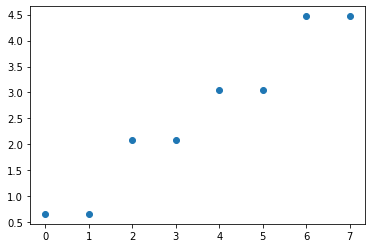

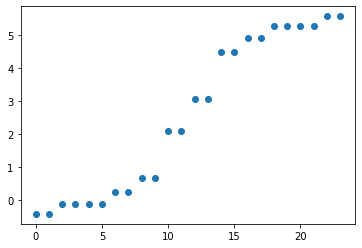

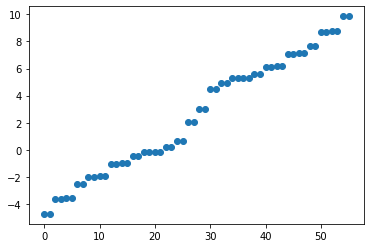

-4.7297
-4.72963
-3.61746
-3.61743
-3.58676
-3.58667
-2.5413
-2.54129
-2.01924
-2.0192
-1.91054
-1.9104
-1.07088
-1.0708
-0.99207
-0.992055
-0.431512
-0.431365
-0.135063
-0.135063
-0.134937
-0.134937
0.225499
0.225663
0.662415
0.662613
2.08574
2.08615
3.04385
3.04426
4.46739
4.46758
4.90434
4.9045
5.26494
5.26494
5.26506
5.26506


In [9]:
plt.plot(evals[ed-4:ed+4], 'o')
plt.show()

plt.plot(evals[ed-12:ed+12], 'o')
plt.show()

plt.plot(evals[:], 'o')
plt.show()

for ev in evals[0:38]:
    print(ev)

In [14]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=2.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], np.cbrt(mod), color=col, zorder=10)
        ax.add_artist(circ)

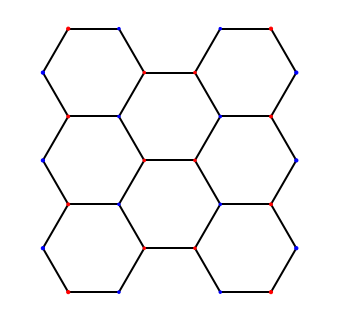

In [15]:
fig=plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')


#plt.xlim([-1, np.min([max_coord, 16.5])])

plt.xlim([-1, max_coord])
plt.ylim([-1, 8])

path = "../figures/figures_7agnr/U_to_t_{}".format(U_param)
fig_name = path + "/spin_diff_7agnr{}_U{}.pdf".format(len_of_agnr, U_param)
#plt.savefig(fig_name, dpi=1000, bbox_inches='tight')